<a href="https://colab.research.google.com/github/Haalibrahim/learning-python/blob/master/Extracting_text_from_PDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading the packages

In [1]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.12 [154 kB]
Fetched 154 kB in 1s (297 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 160706 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.12_amd64.deb ...
Unpacking poppler-utils (0.62.0-2ubuntu2.12) ...
Setting up poppler-utils (0.62.0-2ubuntu2.12) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [2]:
!pip install -q pdf2image
!pip install -q easyocr

     |████████████████████████████████| 63.2MB 54kB/s 


# Importing libraries

In [3]:
from pdf2image import convert_from_path
import easyocr # extract data, optical charactertistic recgonition from images
import numpy as np 
import PIL # this will draw a box around the text
from PIL import ImageDraw
import spacy 


In [4]:
reader = easyocr.Reader(['en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


# Uploading the file

In [5]:
images = convert_from_path("/content/agniel-denis-a0566.pdf")

In [14]:
# Number of pages in the resume
len(images)

5

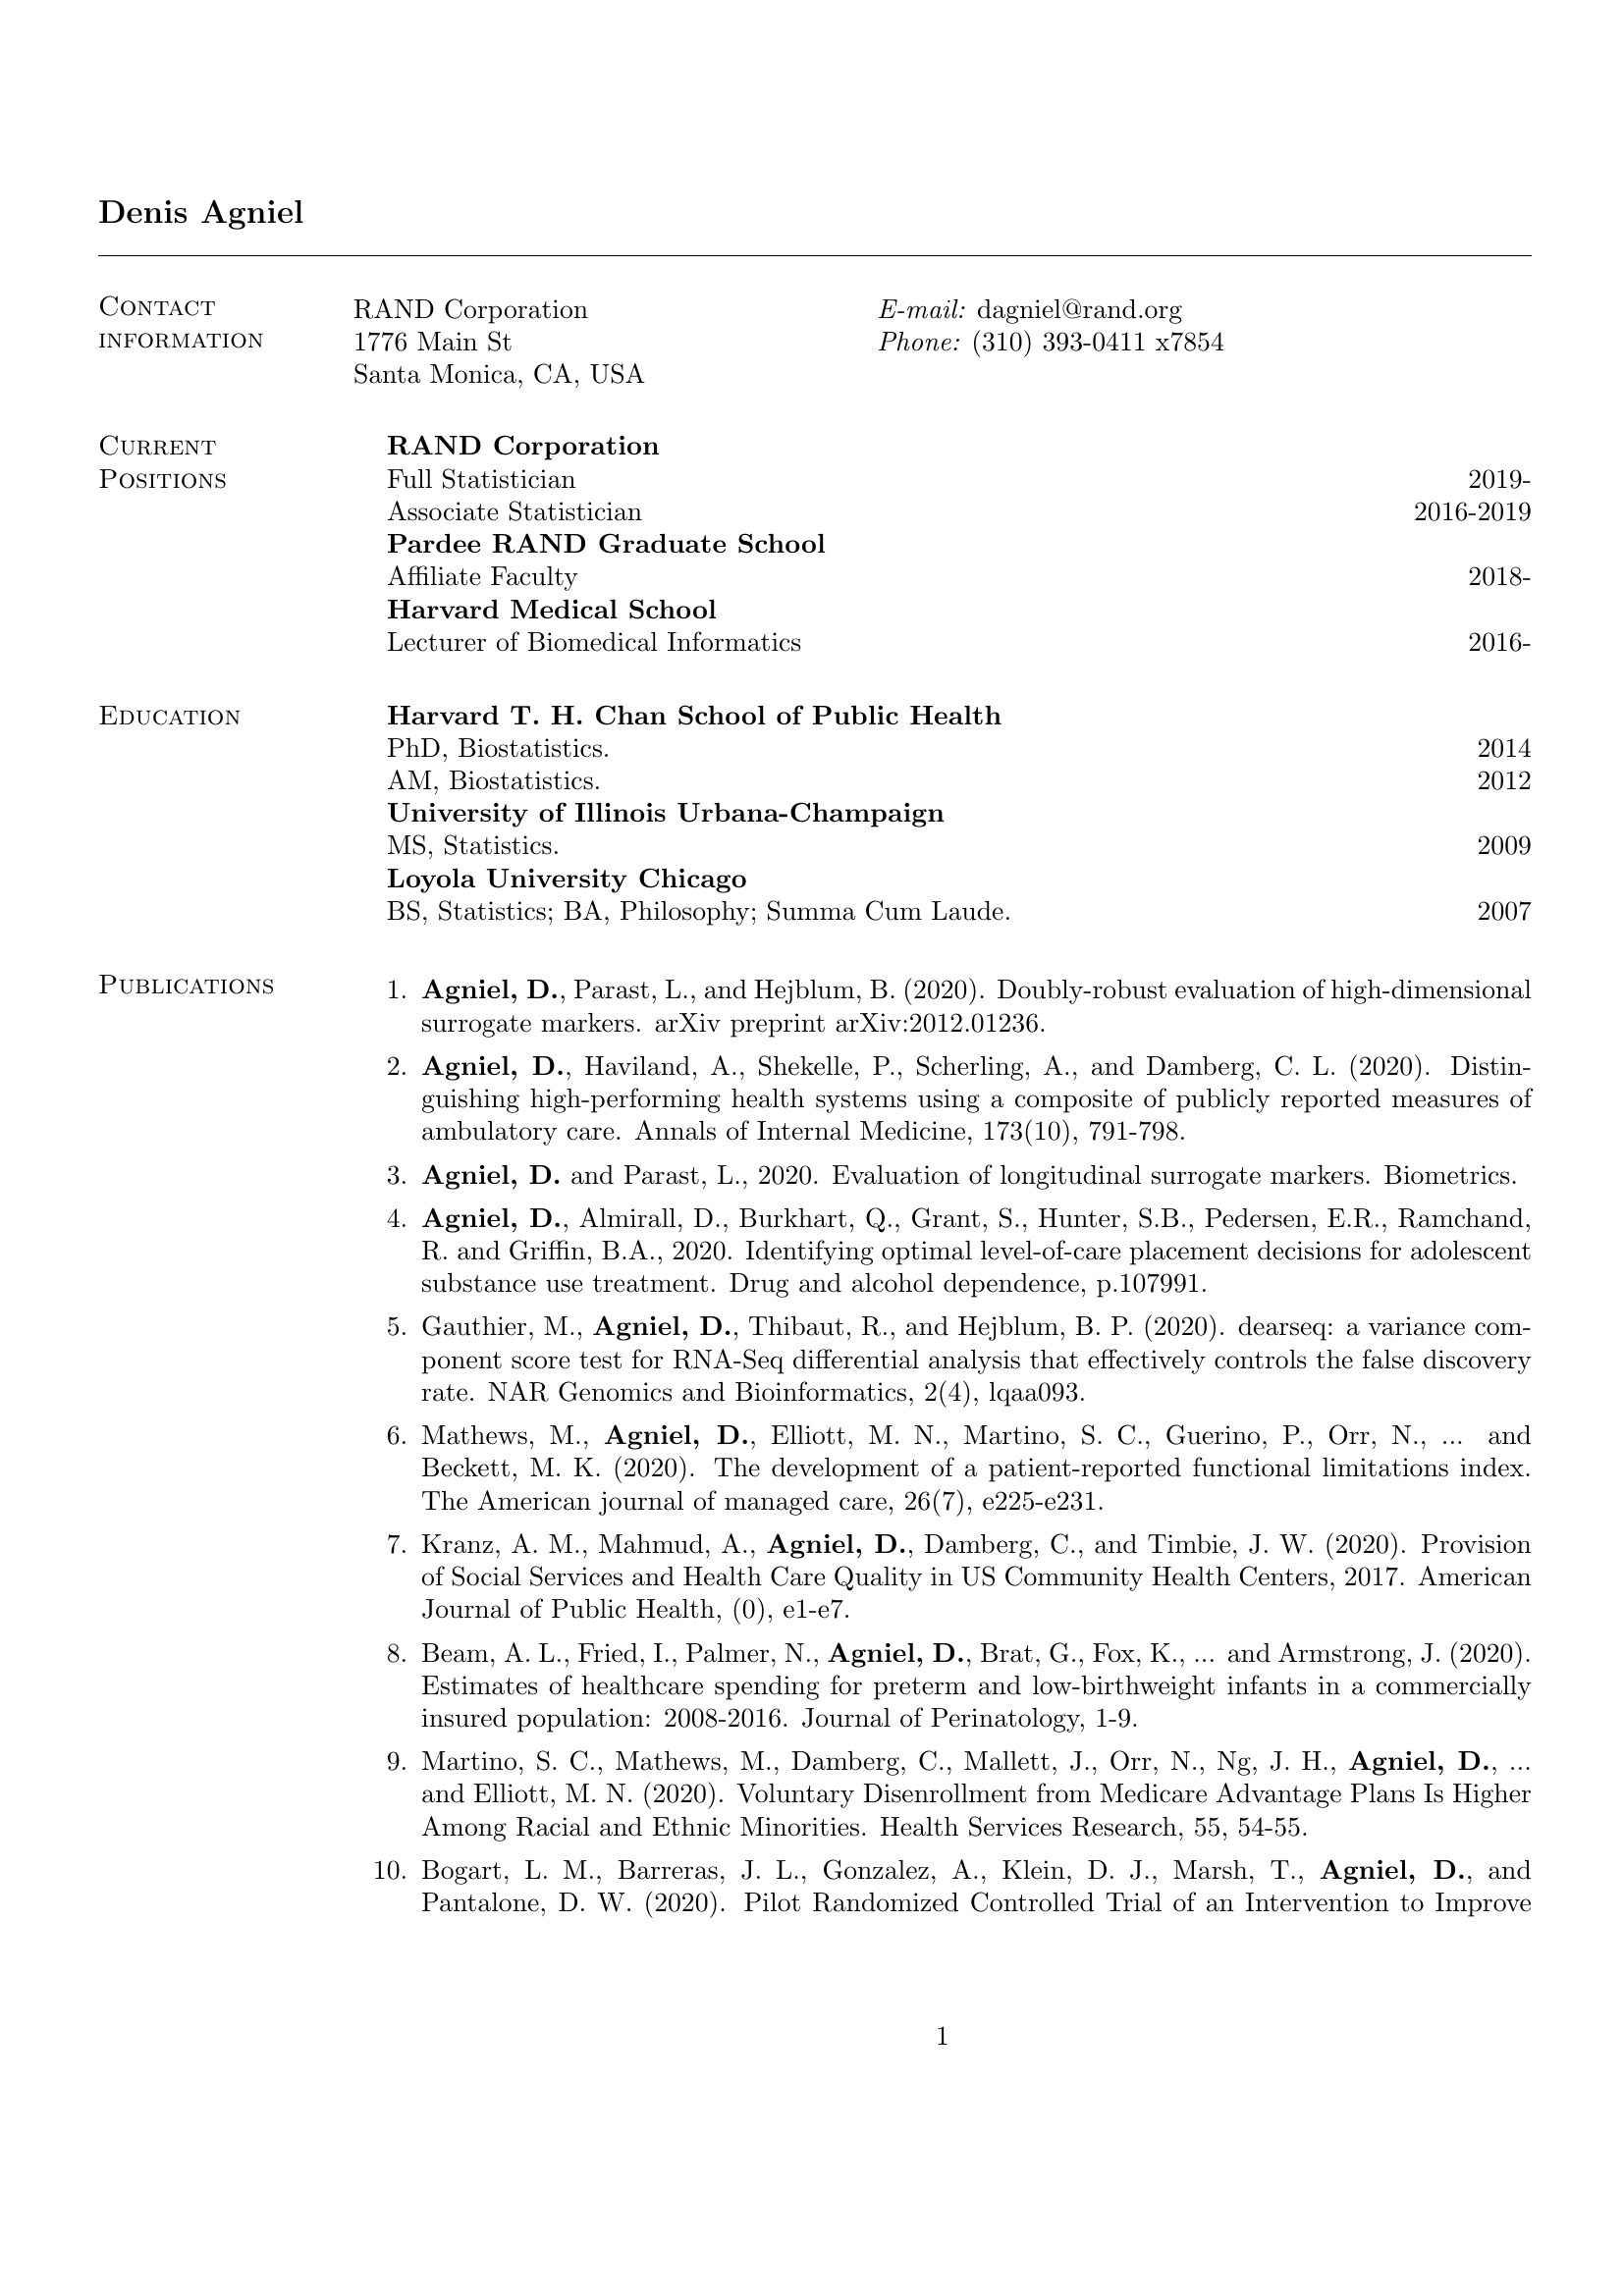

In [13]:
# displaying the pages of the resume
#display the first page
from IPython.display import display, Image
display(images[0])

In [20]:
x= []
for i in range(len(images)):
  x.append(images[i])
  display(x)


[<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1654x2339 at 0x7FF85CF4E810>]

[<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1654x2339 at 0x7FF85CF4E810>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1654x2339 at 0x7FF85CF4EA90>]

[<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1654x2339 at 0x7FF85CF4E810>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1654x2339 at 0x7FF85CF4EA90>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1654x2339 at 0x7FF85CF4EFD0>]

[<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1654x2339 at 0x7FF85CF4E810>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1654x2339 at 0x7FF85CF4EA90>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1654x2339 at 0x7FF85CF4EFD0>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1654x2339 at 0x7FF85CF46AD0>]

[<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1654x2339 at 0x7FF85CF4E810>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1654x2339 at 0x7FF85CF4EA90>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1654x2339 at 0x7FF85CF4EFD0>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1654x2339 at 0x7FF85CF46AD0>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1654x2339 at 0x7FF85CF54590>]

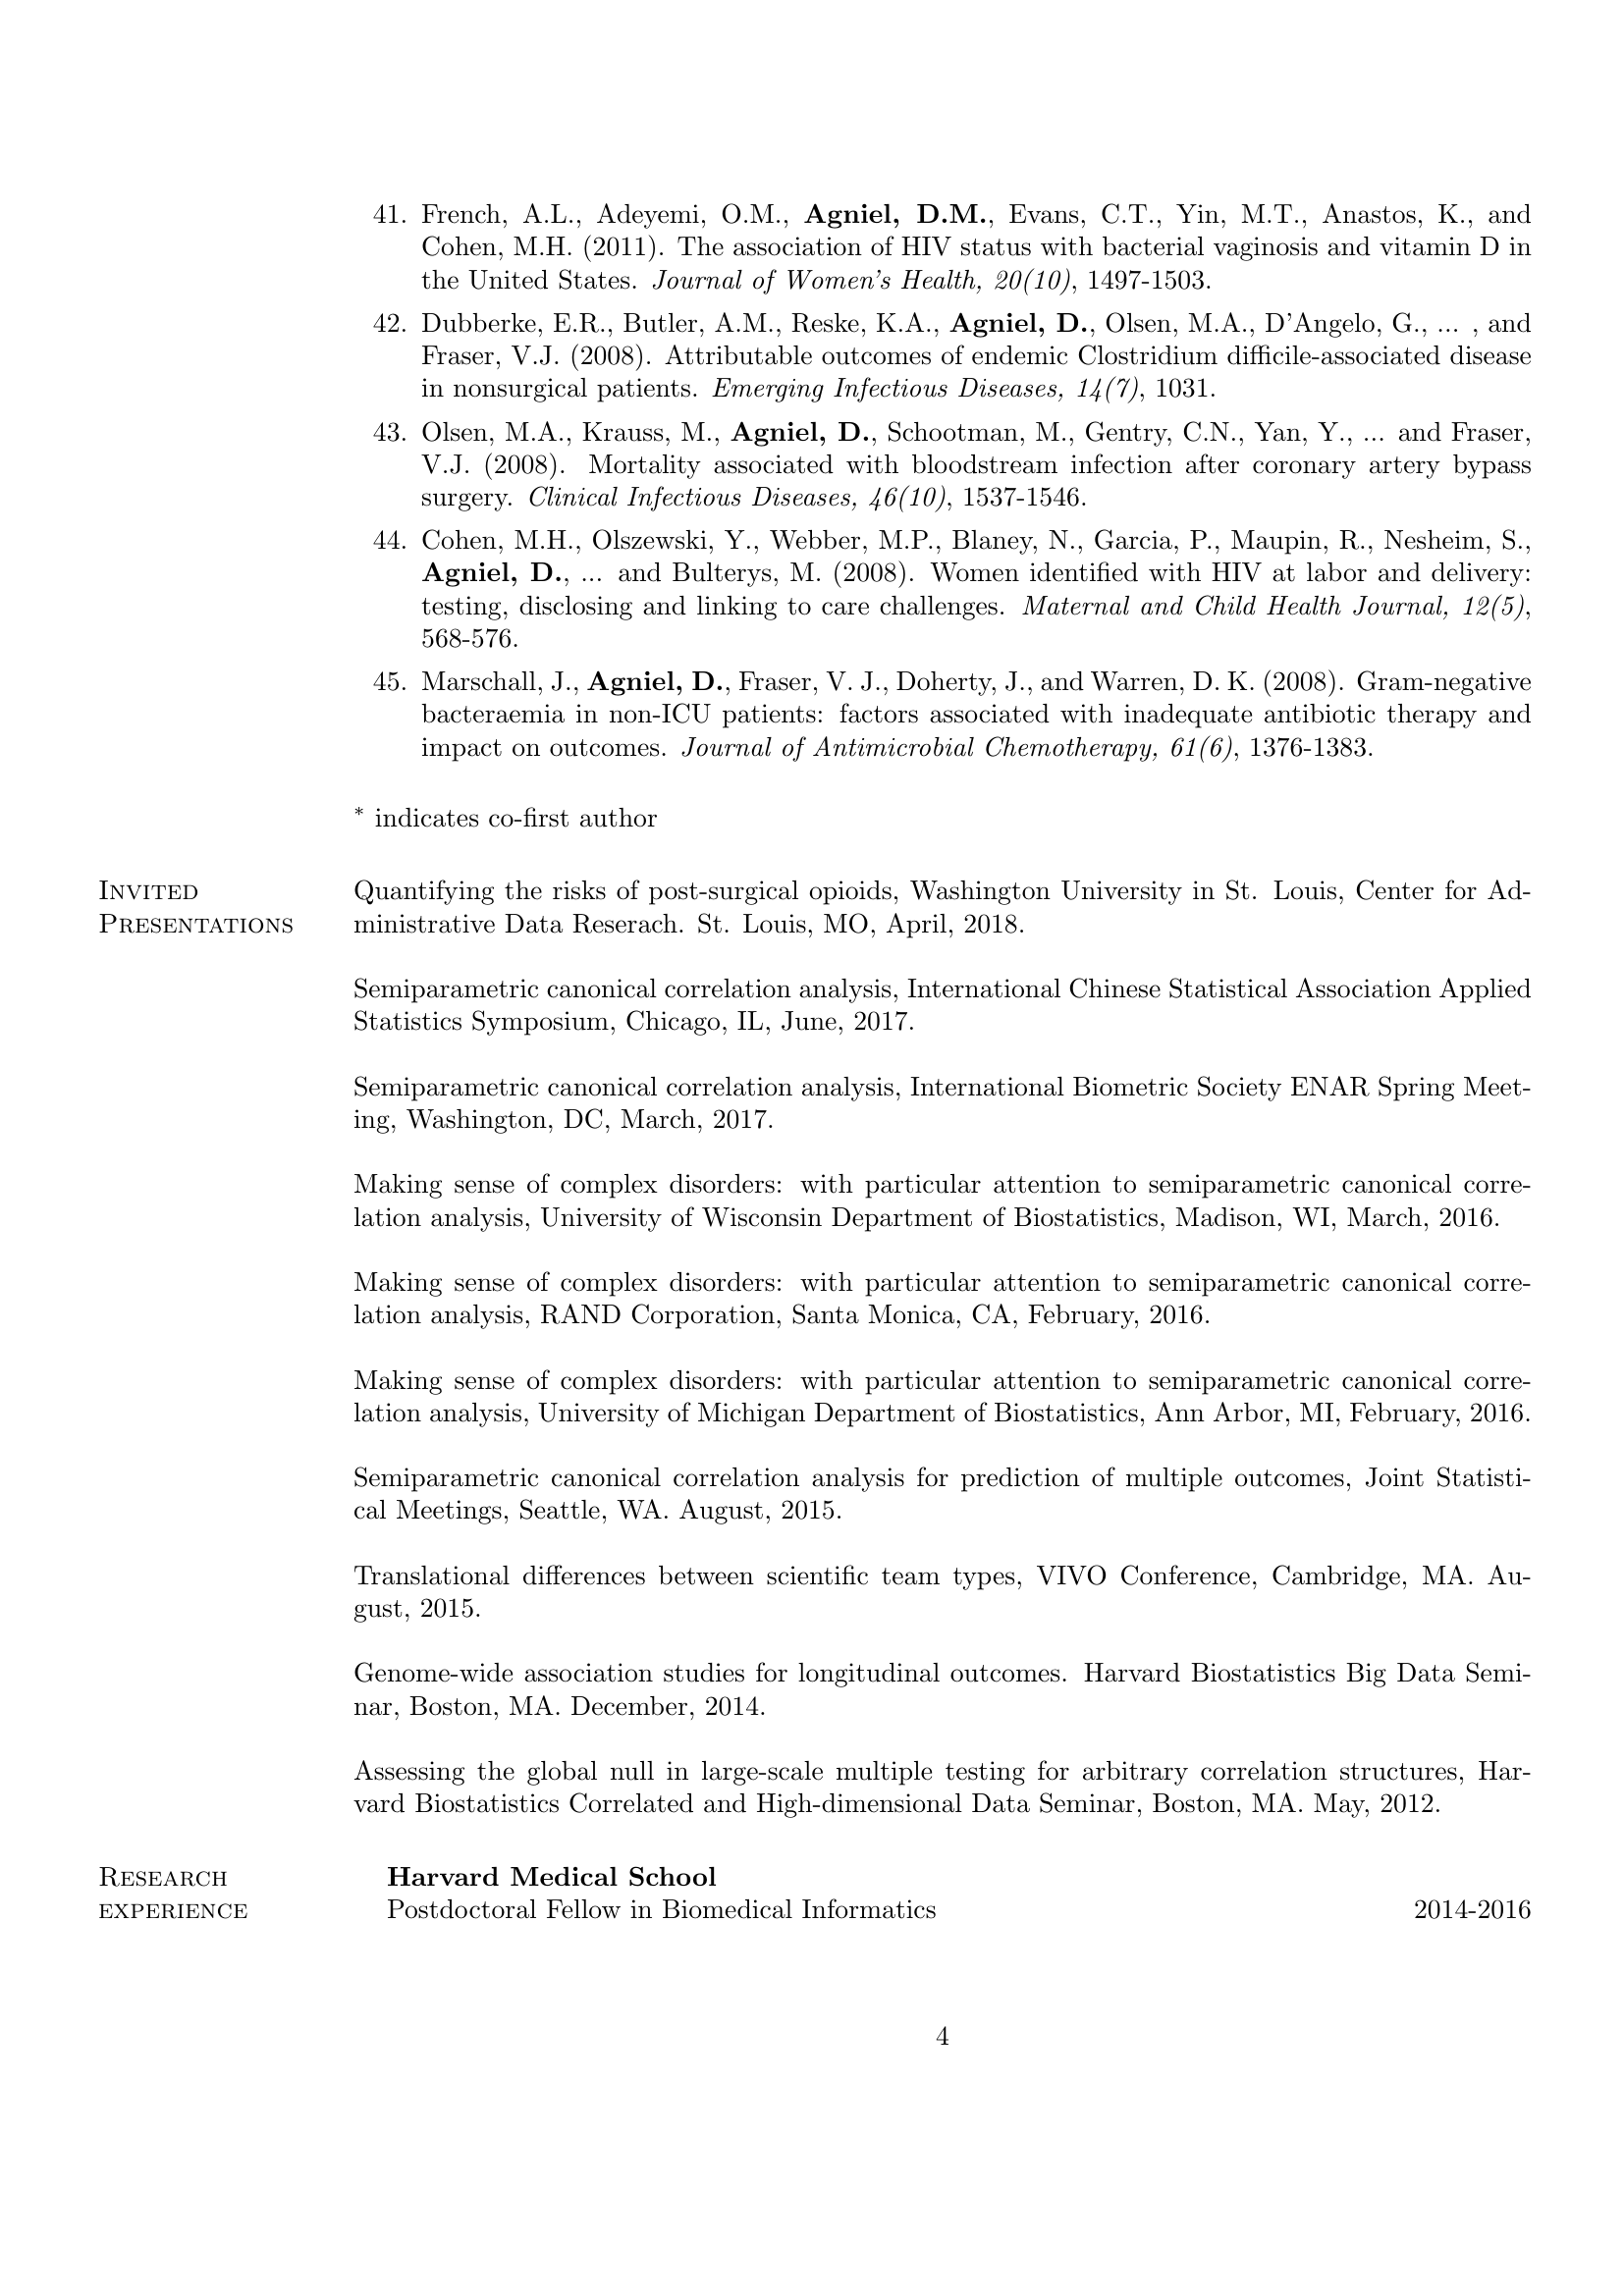

In [22]:
display(x[3])

In [25]:
bounds= reader.readtext(np.array(x[0]))
bounds

[([[96, 197], [315, 197], [315, 240], [96, 240]],
  'Denis Agniel',
  0.9204917136061135),
 ([[98, 297], [222, 297], [222, 325], [98, 325]],
  'CONTACT',
  0.8494551245286018),
 ([[357, 298], [601, 298], [601, 334], [357, 334]],
  'RAND Corporation',
  0.9678441974709933),
 ([[891, 299], [1207, 299], [1207, 335], [891, 335]],
  'E-mail: dagniel@rand.org',
  0.92191548352772),
 ([[98, 333], [269, 333], [269, 357], [98, 357]],
  'INFORMATION',
  0.9999462643345465),
 ([[358, 334], [526, 334], [526, 364], [358, 364]],
  '1776 Main St',
  0.9965378082378219),
 ([[891, 333], [1253, 333], [1253, 369], [891, 369]],
  'Phone: (310) 393-0411 x7854',
  0.9321876656058716),
 ([[357, 364], [659, 364], [659, 401], [357, 401]],
  'Santa Monica, CA; USA',
  0.6724258639518071),
 ([[98, 440], [222, 440], [222, 468], [98, 468]],
  'CURRENT',
  0.9930565921573203),
 ([[392, 440], [674, 440], [674, 472], [392, 472]],
  'RAND Corporation',
  0.9493224779815077),
 ([[98, 474], [234, 474], [234, 502], [98, 

In [28]:
def draw_boxes(image,bounds, color='red',width= 2):
  draw= ImageDraw.Draw(image)
  for bound in bounds:
    p0,p1,p2,p3 = bound[0]
    draw.line([*p0, *p1, *p2 , *p3, *p0] , fill = color , width = width)
  return image

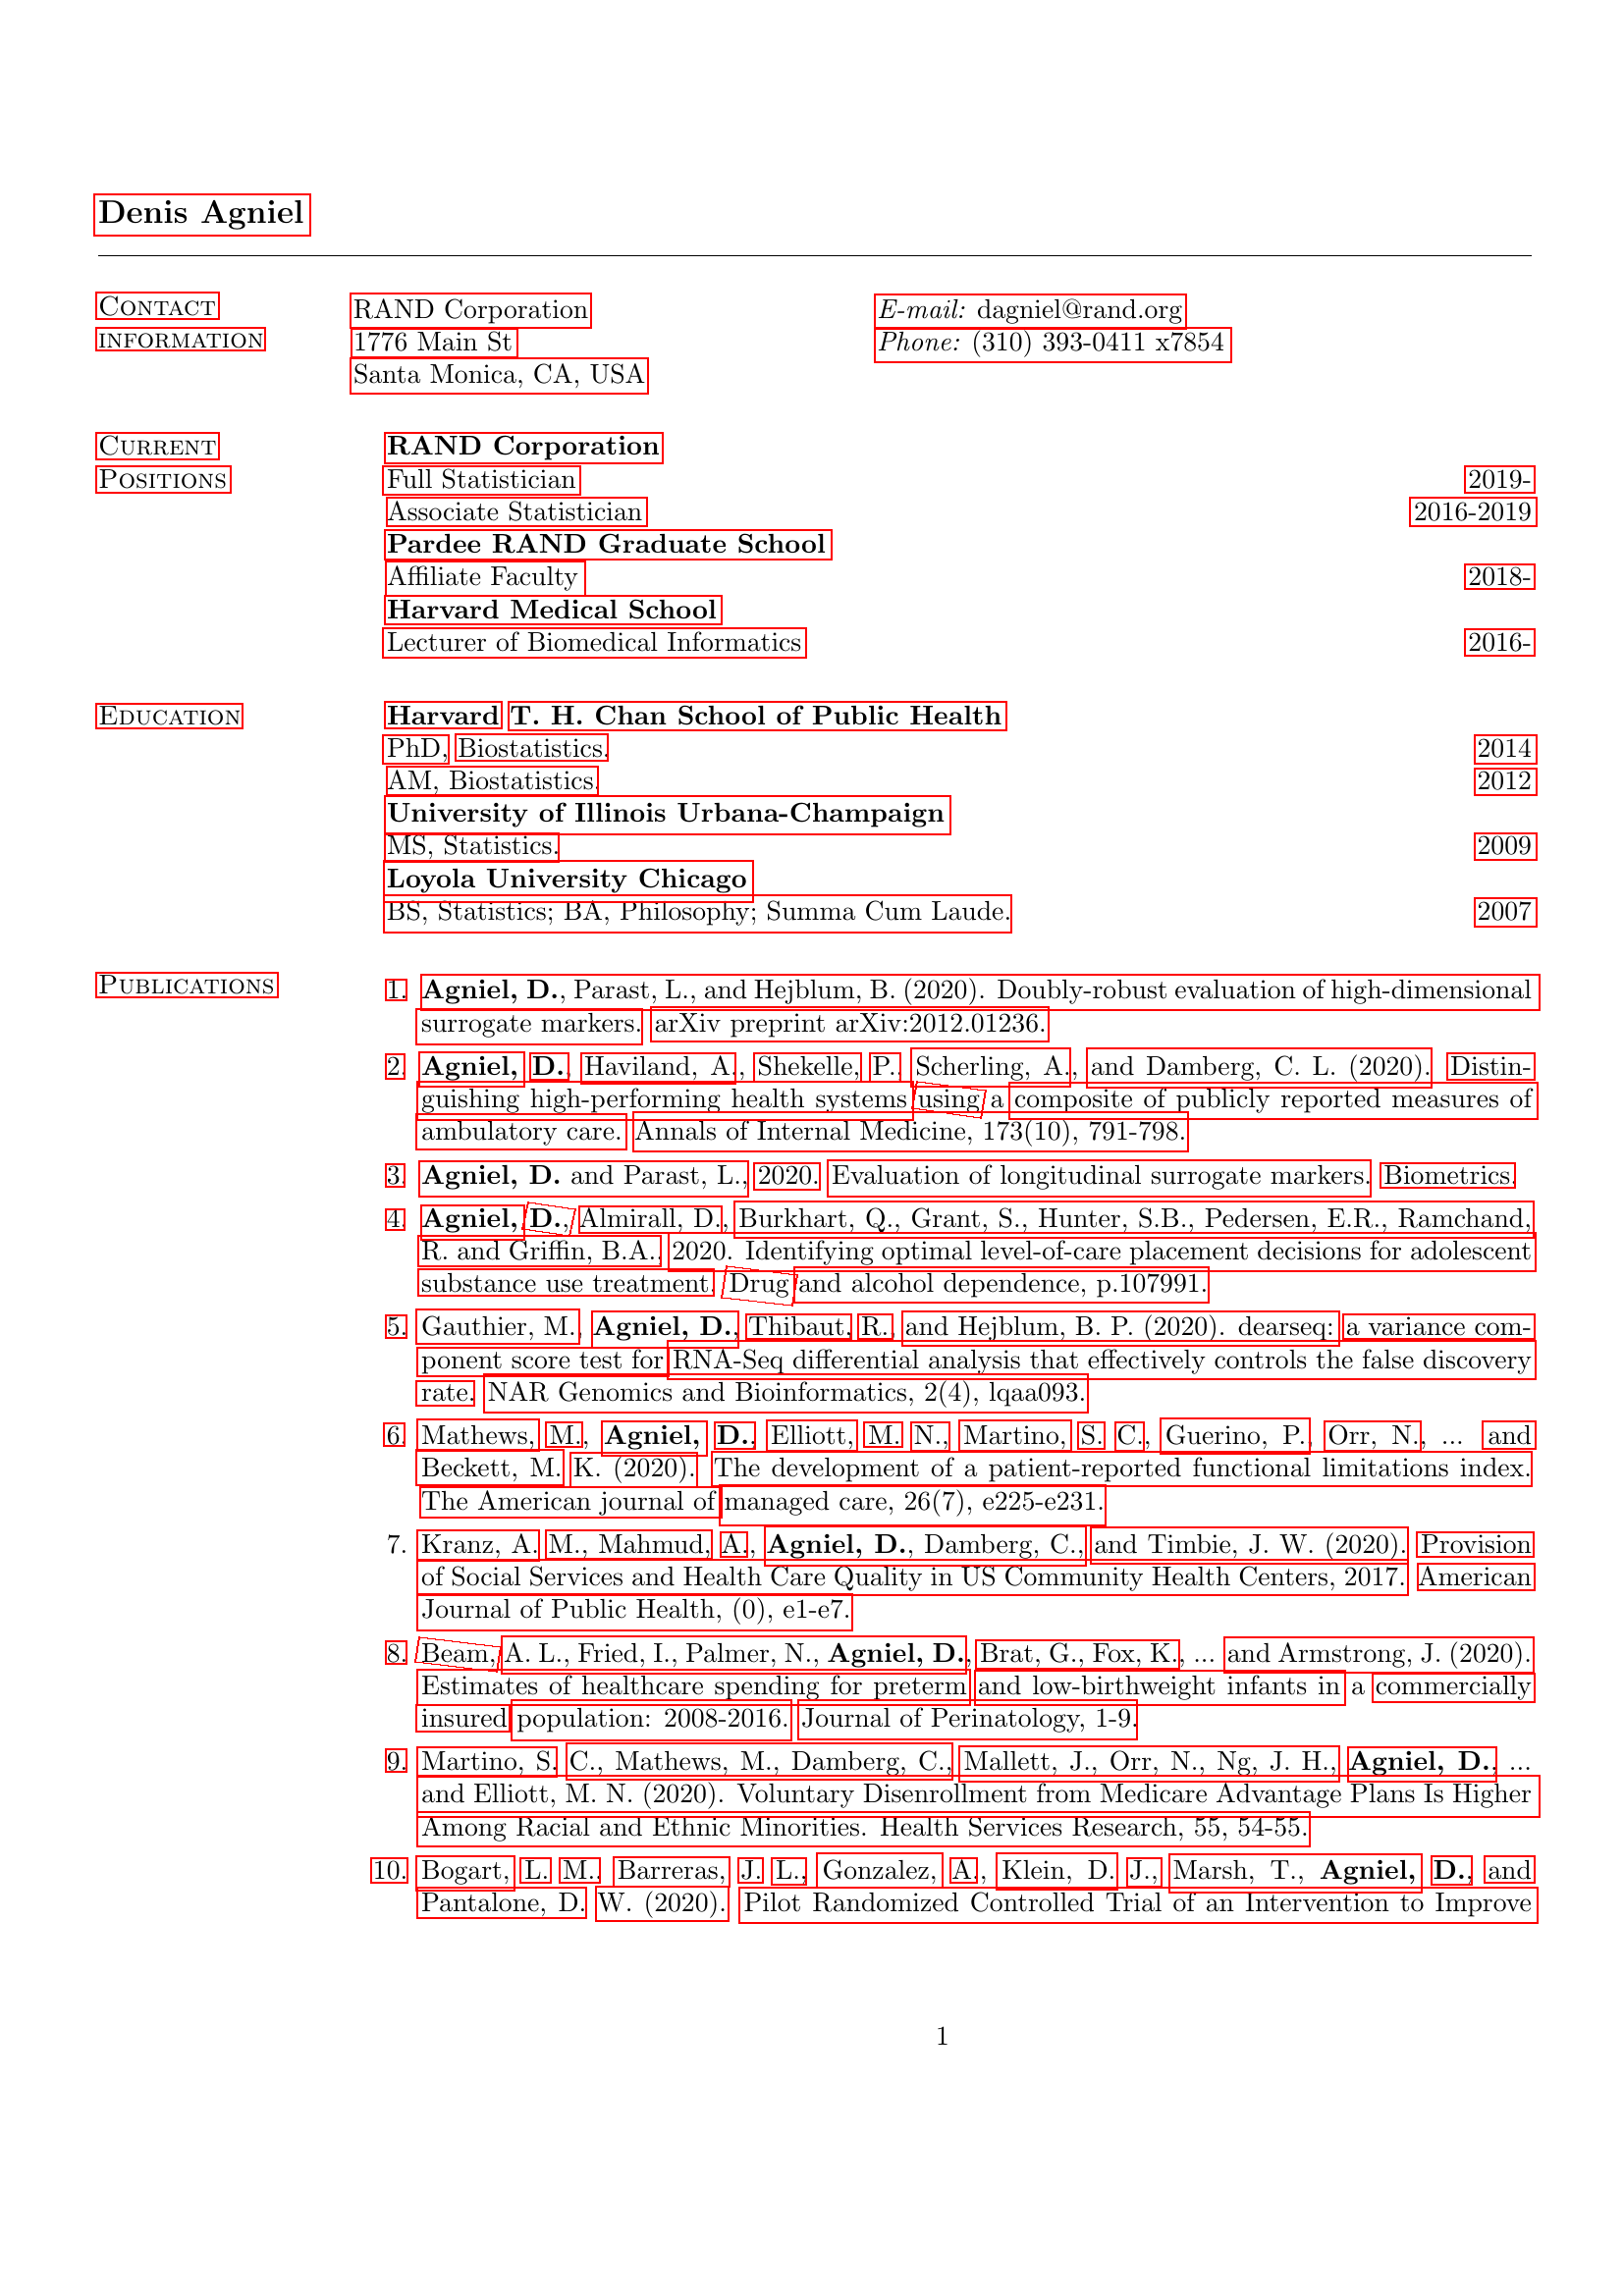

In [34]:
draw_boxes(x[0] , bounds)

In [36]:
bounds[0][1]

'Denis Agniel'

In [40]:
!pip install -q PyPDF2

     |████████████████████████████████| 81kB 3.7MB/s 


In [41]:
import PyPDF2

In [42]:
pdfFileObject = open(r"/content/agniel-denis-a0566.pdf", 'rb')

In [43]:
pdfReader = PyPDF2.PdfFileReader(pdfFileObject)

In [44]:
print(" No. Of Pages :", pdfReader.numPages)

 No. Of Pages : 5


In [45]:
pageObject = pdfReader.getPage(0)

In [46]:
print(pageObject.extractText())

DenisAgniel
Contact
information
RANDCorporation
E-mail:
dagniel@rand.org
1776MainSt
Phone:
(310)393-0411x7854
SantaMonica,CA,USA
Current
Positions
RANDCorporation
FullStatistician
2019-
AssociateStatistician2016-2019
PardeeRANDGraduateSchool
Faculty2018-
HarvardMedicalSchool
LecturerofBiomedicalInformatics2016-
Education
HarvardT.H.ChanSchoolofPublicHealth
PhD,Biostatistics.2014
AM,Biostatistics.2012
UniversityofIllinoisUrbana-Champaign
MS,Statistics.
2009
LoyolaUniversityChicago
BS,Statistics;BA,Philosophy;SummaCumLaude.2007
Publications
1.
Agniel,D.
,Parast,L.,andHejblum,B.(2020).Doubly-robustevaluationofhigh-dimensional
surrogatemarkers.arXivpreprintarXiv:2012.01236.
2.
Agniel,D.
,Haviland,A.,Shekelle,P.,Scherling,A.,andDamberg,C.L.(2020).Distin-
guishinghigh-performinghealthsystemsusingacompositeofpubliclyreportedmeasuresof
ambulatorycare.AnnalsofInternalMedicine,173(10),791-798.
3.
Agniel,D.
andParast,L.,2020.Evaluationoflongitudinalsurrogatemarkers.Biometrics.
4.
Agniel,D.
,Almir

In [47]:
pdfFileObject.close()

In [ ]:
pdfFileObject = open(r"/content/agniel-denis-a0566.pdf", 'rb')

In [49]:
!pip install -q pyPdf

In [54]:
def get_text(path):
    # Load PDF into pyPDF
    pdf = PyPDF2.PdfFileReader(path, "rb")
    # Iterate pages
    content = ""
    for i in range(0, pdf.getNumPages()):
        content += pdf.getPage(i).extractText() + "\n"  # Extract text from page and add to content
    # Collapse whitespace
    content = " ".join(content.replace(u"\xa0", " ").strip().split())
    return content

In [55]:
get_text('/content/agniel-denis-a0566.pdf')

"DenisAgniel Contact information RANDCorporation E-mail: dagniel@rand.org 1776MainSt Phone: (310)393-0411x7854 SantaMonica,CA,USA Current Positions RANDCorporation FullStatistician 2019- AssociateStatistician2016-2019 PardeeRANDGraduateSchool Faculty2018- HarvardMedicalSchool LecturerofBiomedicalInformatics2016- Education HarvardT.H.ChanSchoolofPublicHealth PhD,Biostatistics.2014 AM,Biostatistics.2012 UniversityofIllinoisUrbana-Champaign MS,Statistics. 2009 LoyolaUniversityChicago BS,Statistics;BA,Philosophy;SummaCumLaude.2007 Publications 1. Agniel,D. ,Parast,L.,andHejblum,B.(2020).Doubly-robustevaluationofhigh-dimensional surrogatemarkers.arXivpreprintarXiv:2012.01236. 2. Agniel,D. ,Haviland,A.,Shekelle,P.,Scherling,A.,andDamberg,C.L.(2020).Distin- guishinghigh-performinghealthsystemsusingacompositeofpubliclyreportedmeasuresof ambulatorycare.AnnalsofInternalMedicine,173(10),791-798. 3. Agniel,D. andParast,L.,2020.Evaluationoflongitudinalsurrogatemarkers.Biometrics. 4. Agniel,D. ,Almi

In [64]:
"""Use pdftotext to extract text from PDFs."""

import pdftotext

with open("/content/agniel-denis-a0566.pdf") as f:
    pdf = pdftotext.PDF(f)

# Iterate over all the pages
for page in pdf:
    print(page)

ModuleNotFoundError: ignored

In [65]:
pip install pdftotext

  Using cached https://files.pythonhosted.org/packages/df/ad/87e0429c74f50721b90e0f4b5700d66b2ba2e5bf3d3a59acf1bb81dfac7a/pdftotext-2.1.5.tar.gz
  ERROR: Failed building wheel for pdftotext
  Running setup.py clean for pdftotext
Failed to build pdftotext
    Running setup.py install for pdftotext ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-lvurzi1o/pdftotext/setup.py'"'"'; __file__='"'"'/tmp/pip-install-lvurzi1o/pdftotext/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-4fto5ibb/install-record.txt --single-version-externally-managed --compile Check the logs for full command output.


In [67]:
!apt-get install libpoppler-cpp-dev7

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libpoppler-cpp-dev7



# How to Extract text from PDF

In [3]:
!pip install PyPDF2

     |████████████████████████████████| 81kB 3.8MB/s 
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-cp37-none-any.whl size=61085 sha256=55e2d9f0ff8cc3eea07b39dc6c4319be06f9131895dc48ae81460f19f3149596
  Stored in directory: /root/.cache/pip/wheels/53/84/19/35bc977c8bf5f0c23a8a011aa958acd4da4bbd7a229315c1b7
Successfully built PyPDF2


In [4]:
import PyPDF2

In [5]:
from PyPDF2 import PdfFileReader

# Opening a file

In [6]:
target_file='/content/agniel-denis-a0566.pdf'

In [7]:
opened_file=open(target_file,'rb')

In [8]:
pdf=PdfFileReader(opened_file)

# Get number of pages

In [9]:
num_pages=pdf.getNumPages()

In [10]:
print(num_pages)

5


# Extract text

In [11]:
page=pdf.getPage(0)

In [12]:
text=page.extractText()

In [13]:
print(text)

DenisAgniel
Contact
information
RANDCorporation
E-mail:
dagniel@rand.org
1776MainSt
Phone:
(310)393-0411x7854
SantaMonica,CA,USA
Current
Positions
RANDCorporation
FullStatistician
2019-
AssociateStatistician2016-2019
PardeeRANDGraduateSchool
Faculty2018-
HarvardMedicalSchool
LecturerofBiomedicalInformatics2016-
Education
HarvardT.H.ChanSchoolofPublicHealth
PhD,Biostatistics.2014
AM,Biostatistics.2012
UniversityofIllinoisUrbana-Champaign
MS,Statistics.
2009
LoyolaUniversityChicago
BS,Statistics;BA,Philosophy;SummaCumLaude.2007
Publications
1.
Agniel,D.
,Parast,L.,andHejblum,B.(2020).Doubly-robustevaluationofhigh-dimensional
surrogatemarkers.arXivpreprintarXiv:2012.01236.
2.
Agniel,D.
,Haviland,A.,Shekelle,P.,Scherling,A.,andDamberg,C.L.(2020).Distin-
guishinghigh-performinghealthsystemsusingacompositeofpubliclyreportedmeasuresof
ambulatorycare.AnnalsofInternalMedicine,173(10),791-798.
3.
Agniel,D.
andParast,L.,2020.Evaluationoflongitudinalsurrogatemarkers.Biometrics.
4.
Agniel,D.
,Almir

In [14]:
text=''
for i in range(num_pages):
  page = pdf.getPage(i)
  text = text + ' ' + page.extractText()

In [15]:
print(len(text))

13259


In [16]:
print(text)

 DenisAgniel
Contact
information
RANDCorporation
E-mail:
dagniel@rand.org
1776MainSt
Phone:
(310)393-0411x7854
SantaMonica,CA,USA
Current
Positions
RANDCorporation
FullStatistician
2019-
AssociateStatistician2016-2019
PardeeRANDGraduateSchool
Faculty2018-
HarvardMedicalSchool
LecturerofBiomedicalInformatics2016-
Education
HarvardT.H.ChanSchoolofPublicHealth
PhD,Biostatistics.2014
AM,Biostatistics.2012
UniversityofIllinoisUrbana-Champaign
MS,Statistics.
2009
LoyolaUniversityChicago
BS,Statistics;BA,Philosophy;SummaCumLaude.2007
Publications
1.
Agniel,D.
,Parast,L.,andHejblum,B.(2020).Doubly-robustevaluationofhigh-dimensional
surrogatemarkers.arXivpreprintarXiv:2012.01236.
2.
Agniel,D.
,Haviland,A.,Shekelle,P.,Scherling,A.,andDamberg,C.L.(2020).Distin-
guishinghigh-performinghealthsystemsusingacompositeofpubliclyreportedmeasuresof
ambulatorycare.AnnalsofInternalMedicine,173(10),791-798.
3.
Agniel,D.
andParast,L.,2020.Evaluationoflongitudinalsurrogatemarkers.Biometrics.
4.
Agniel,D.
,Almi

In [17]:
cleanText=''
for myWord in text:
    if myWord != '\n':
        cleanText += myWord
text = cleanText.split()
print(text)

['DenisAgnielContactinformationRANDCorporationE-mail:dagniel@rand.org1776MainStPhone:(310)393-0411x7854SantaMonica,CA,USACurrentPositionsRANDCorporationFullStatistician2019-AssociateStatistician2016-2019PardeeRANDGraduateSchoolFaculty2018-HarvardMedicalSchoolLecturerofBiomedicalInformatics2016-EducationHarvardT.H.ChanSchoolofPublicHealthPhD,Biostatistics.2014AM,Biostatistics.2012UniversityofIllinoisUrbana-ChampaignMS,Statistics.2009LoyolaUniversityChicagoBS,Statistics;BA,Philosophy;SummaCumLaude.2007Publications1.Agniel,D.,Parast,L.,andHejblum,B.(2020).Doubly-robustevaluationofhigh-dimensionalsurrogatemarkers.arXivpreprintarXiv:2012.01236.2.Agniel,D.,Haviland,A.,Shekelle,P.,Scherling,A.,andDamberg,C.L.(2020).Distin-guishinghigh-performinghealthsystemsusingacompositeofpubliclyreportedmeasuresofambulatorycare.AnnalsofInternalMedicine,173(10),791-798.3.Agniel,D.andParast,L.,2020.Evaluationoflongitudinalsurrogatemarkers.Biometrics.4.Agniel,D.,Almirall,D.,Burkhart,Q.,Grant,S.,Hunter,S.B.,Pe